In [3]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from adjustText import adjust_text

# Load data:
clark_county_ts2021 = pd.read_csv("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/Clark_County_TS2021.csv")
bridges_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/bridges.xlsx")

#naics_stcc = pd.read_excel("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/STCC_NAICS.xlsx")
naics_stcc_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/STCC_NAICS.xlsx")

# Load necessary sheets from the Excel file
stcc = bridges_excel.parse("STCC")
modes = bridges_excel.parse("Modes")

naics_stcc = naics_stcc_excel.parse("stcc_naics_bridge")
naics_desc = naics_stcc_excel.parse("naics_description")

# Checking for duplicates
clark_county_ts2021 = clark_county_ts2021.drop_duplicates()

# Ensure 'STCC4' column in both dataframes is of type string
# For example, replace NaN with a known string
stcc['STCC4'] = stcc['STCC4'].astype(str)
naics_stcc['STCC4'] = naics_stcc['STCC4'].astype(str)
naics_stcc['NAICS_code'] = naics_stcc['NAICS_code'].astype(str)
# Create a new DataFrame from 'stcc' that only includes rows with 2-digit 'STCC' codes
stcc_2digit = stcc[stcc['STCC'].str.len() == 2].copy()
# Ensure 'STCC4' is of type string
stcc_2digit['STCC4'] = stcc_2digit['STCC4'].astype(str)
# Merge stcc_2digit and naics_stcc using STCC4
#stcc_2digit = pd.merge(stcc_2digit, naics_stcc, how='left', on='STCC4')
stcc = pd.merge(stcc, naics_stcc, how='left', on='STCC4')

# Merge stcc (which now includes naics_stcc data) into clark_county_ts2021 using STCC
clark_county_ts2021 = pd.merge(clark_county_ts2021, stcc, how='left', on='STCC')

# Merge modes into clark_county_ts2021 using Mode
clark_county_ts2021 = pd.merge(clark_county_ts2021, modes, how='left', on='Mode')

# Create 'STCC_2digit' column in 'clark_county_ts2021' DataFrame
clark_county_ts2021['STCC_2digit'] = clark_county_ts2021['STCC'].str[:2]

# Print DataFrame to check
#print(clark_county_ts2021)


In [4]:
clark_county_ts2021

Year  Origin Region  Destination Region   STCC Trade Type  Mode  \
0        2015              1                 165  01 14          D     4   
1        2015              1                 165  01 19          D     4   
2        2015              1                 165  14 51          D     4   
3        2015              1                 166  35 35          D     5   
4        2015              1               32003  01 19          D     4   
...       ...            ...                 ...    ...        ...   ...   
1058238  2050          32003               32003   50 1          D     5   
1058239  2050          32003               32003   50 1          D     6   
1058240  2050          32003               32003  50 22          D     4   
1058241  2050          32003               32003  50 31          D     4   
1058242  2050          32003               32003  50 32          D     4   

                  Tons         Units         Value  Average Miles  ...  \
0             0.060575      0.003927  1.678699e+01      2348.3999  ...   
1             0.447512      0.021637  6.846934e+01      2348.3999  ...   
2             0.295351      0.012149  1.261019e+01      2339.9998  ...   
3             3.790659      0.285492  3.219333e+04      2192.8999  ...   
4             0.735466      0.035559  1.125264e+02      1970.6001  ...   
...                ...           ...           ...            ...  ...   
1058238   36925.441000   1796.137100  5.283480e+07        16.0000  ...   
1058239  841962.750000  40954.977000  1.204723e+09        16.0000  ...   
1058240  196761.920000  13588.907000  1.063695e+09        16.0000  ...   
1058241   62400.527000   3167.539600  8.104652e+08        16.0000  ...   
1058242   67059.625000   3404.042000  8.709781e+08        16.0000  ...   

         To FIPS  Entry Road  Exit Road                          Commodity  \
0          32023         U93        U95         Oil Kernels, Nuts or Seeds   
1          32023         U93        U95                  Misc. Field Crops   
2          32023         U93        U95    Clay Ceramic or Refrac Minerals   
3          32017         U93        U93                 Conveyors or Parts   
4              0         U93     LSahar                  Misc. Field Crops   
...          ...         ...        ...                                ...   
1058238        0         NaN        NaN    Warehouse & Distribution Center   
1058239        0         NaN        NaN    Warehouse & Distribution Center   
1058240        0         NaN        NaN  Rail Intermodal Drayage from Ramp   
1058241        0         NaN        NaN     Air Freight Drayage to Airport   
1058242        0         NaN        NaN   Air Freight Drayage from Airport   

        STCC4 NAICS_code Code             Name  Group STCC_2digit  
0         114     111110   TL  Truck Truckload  Truck          01  
1         119     111900   TL  Truck Truckload  Truck          01  
2        1451     212324   TL  Truck Truckload  Truck          14  
3        3535     333922  LTL      Truck L-T-L  Truck          35  
4         119     111900   TL  Truck Truckload  Truck          01  
...       ...        ...  ...              ...    ...         ...  
1058238  5010     493000  LTL      Truck L-T-L  Truck          50  
1058239  5010     493000  PVT        Truck PVT  Truck          50  
1058240  5022     482110   TL  Truck Truckload  Truck          50  
1058241  5031     481000   TL  Truck Truckload  Truck          50  
1058242  5032     481000   TL  Truck Truckload  Truck          50  

[1058243 rows x 23 columns]

In [5]:
print(clark_county_ts2021.columns)


Index(['Year', 'Origin Region', 'Destination Region', 'STCC', 'Trade Type',
       'Mode', 'Tons', 'Units', 'Value', 'Average Miles', 'First Node',
       'Last Node', 'From FIPS', 'To FIPS', 'Entry Road', 'Exit Road',
       'Commodity', 'STCC4', 'NAICS_code', 'Code', 'Name', 'Group',
       'STCC_2digit'],
      dtype='object')


In [18]:
summary = clark_county_ts2021.groupby(['Year', 'STCC_2digit', 'STCC_y', 'Commodity_y'])[['Tons', 'Value']].sum().reset_index()


In [13]:
clark_county_ts2021

Year  Origin Region  Destination Region STCC_x Trade Type  Mode  \
0        2015              1                 165  01 14          D     4   
1        2015              1                 165  01 19          D     4   
2        2015              1                 165  14 51          D     4   
3        2015              1                 166  35 35          D     5   
4        2015              1               32003  01 19          D     4   
...       ...            ...                 ...    ...        ...   ...   
1058238  2050          32003               32003   50 1          D     5   
1058239  2050          32003               32003   50 1          D     6   
1058240  2050          32003               32003  50 22          D     4   
1058241  2050          32003               32003  50 31          D     4   
1058242  2050          32003               32003  50 32          D     4   

                  Tons         Units         Value  Average Miles  ...  \
0             0.060575      0.003927  1.678699e+01      2348.3999  ...   
1             0.447512      0.021637  6.846934e+01      2348.3999  ...   
2             0.295351      0.012149  1.261019e+01      2339.9998  ...   
3             3.790659      0.285492  3.219333e+04      2192.8999  ...   
4             0.735466      0.035559  1.125264e+02      1970.6001  ...   
...                ...           ...           ...            ...  ...   
1058238   36925.441000   1796.137100  5.283480e+07        16.0000  ...   
1058239  841962.750000  40954.977000  1.204723e+09        16.0000  ...   
1058240  196761.920000  13588.907000  1.063695e+09        16.0000  ...   
1058241   62400.527000   3167.539600  8.104652e+08        16.0000  ...   
1058242   67059.625000   3404.042000  8.709781e+08        16.0000  ...   

         STCC4_x  NAICS_code_x  Code             Name  Group STCC_2digit  \
0            114        111110    TL  Truck Truckload  Truck          01   
1            119        111900    TL  Truck Truckload  Truck          01   
2           1451        212324    TL  Truck Truckload  Truck          14   
3           3535        333922   LTL      Truck L-T-L  Truck          35   
4            119        111900    TL  Truck Truckload  Truck          01   
...          ...           ...   ...              ...    ...         ...   
1058238     5010        493000   LTL      Truck L-T-L  Truck          50   
1058239     5010        493000   PVT        Truck PVT  Truck          50   
1058240     5022        482110    TL  Truck Truckload  Truck          50   
1058241     5031        481000    TL  Truck Truckload  Truck          50   
1058242     5032        481000    TL  Truck Truckload  Truck          50   

        STCC_y           Commodity_y STCC4_y NAICS_code_y  
0           01         Farm Products     100          NaN  
1           01         Farm Products     100          NaN  
2           14  Nonmetallic Minerals    1400       212300  
3           35             Machinery    3500          NaN  
4           01         Farm Products     100          NaN  
...        ...                   ...     ...          ...  
1058238     50     Secondary Traffic    5000          NaN  
1058239     50     Secondary Traffic    5000          NaN  
1058240     50     Secondary Traffic    5000          NaN  
1058241     50     Secondary Traffic    5000          NaN  
1058242     50     Secondary Traffic    5000          NaN  

[1058243 rows x 27 columns]

### Create the circular charts function, without saving the pngs. And create the summary data base after.

In [15]:
import seaborn as sns
from matplotlib.patches import Patch


def create_commodity_circular_bar_chart(df, year, variable):
    df_year = df[(df['Year'] == year) & (df[variable] > 0)]
    
    if df_year.empty:
        print(f"No positive values for '{variable}' in year {year}. Skipping plot.")
        return
    
    # Sort the DataFrame by 'variable'
    df_year = df_year.sort_values(by=variable)
    
    commodities = df_year['Commodity'].unique()
    color_dict = dict(zip(commodities, sns.color_palette("hls", len(commodities))))
    
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))
    
    lowerLimit = 10
    upperLimit = 100
    
    max_val = df_year[variable].max()
    slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
    heights = slope * np.cbrt(df_year[variable]) + lowerLimit
    
    widths = 2*np.pi / len(commodities)
    indices = range(len(df_year))
    angles = [i*widths for i in indices]
    
    bars = ax.bar(x=angles, height=heights, width=widths, bottom=lowerLimit, linewidth=2, edgecolor='white')
    
    for bar, angle, height, commodity in zip(bars, angles, heights, df_year['Commodity']):
        bar.set_facecolor(color_dict[commodity])
        bar.set_alpha(0.7)
    
    ax.set_yticks([])
    ax.set_xticks(angles)
    ax.set_xticklabels(df_year['STCC_2digit'], fontsize=8, rotation=45)
    
    ax.set_title(f'{variable} by Commodity for Year {year}', size=20, color='grey', y=1.1)
    
    ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax2.axis('off')

    legend_elements = [Patch(facecolor=color_dict[commodity], label=commodity) for commodity in commodities]
    ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
    
    plt.show()

In [10]:
#Create 'STCC_2digit' column in 'clark_county_ts2021' DataFrame
clark_county_ts2021['STCC_2digit'] = clark_county_ts2021['STCC'].str[:2]

#Create a new DataFrame from 'stcc' that only includes rows with 2-digit 'STCC' codes
stcc_2digit = stcc[stcc['STCC'].str.len() == 2]


#Merge 'clark_county_ts2021' DataFrame with 'stcc_2digit' DataFrame
clark_county_ts2021 = pd.merge(clark_county_ts2021, stcc_2digit, how='left', left_on='STCC_2digit', right_on='STCC')


KeyError: 'STCC'

In [21]:
# Concatenate 'STCC_2digit' and 'Commodity_y'
summary['Commodity'] = summary.apply(lambda row: f"{row['STCC_2digit']} {row['Commodity_y']}", axis=1)

In [22]:
print(summary.columns)

Index(['Year', 'STCC_2digit', 'STCC_y', 'Commodity_y', 'Tons', 'Value',
       'Commodity'],
      dtype='object')


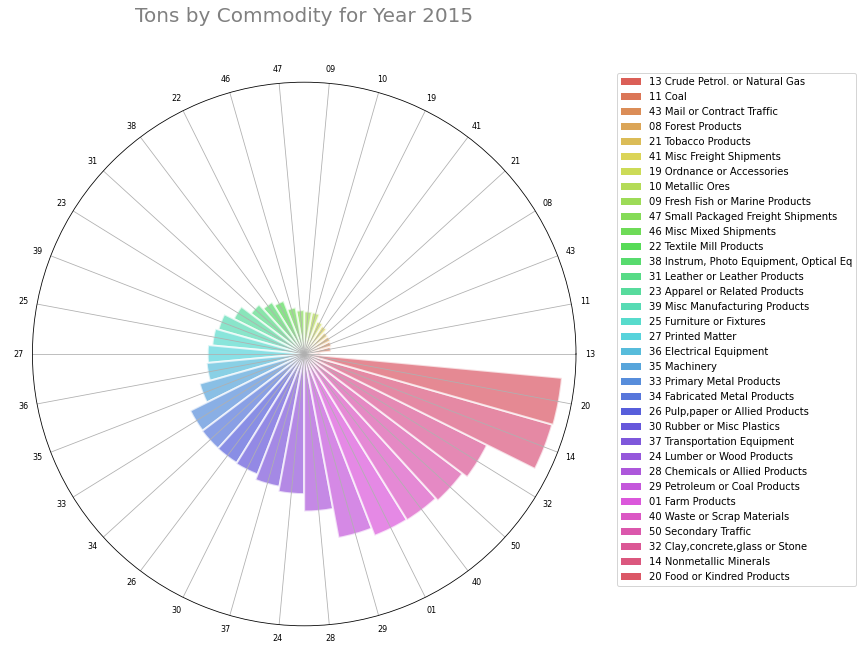

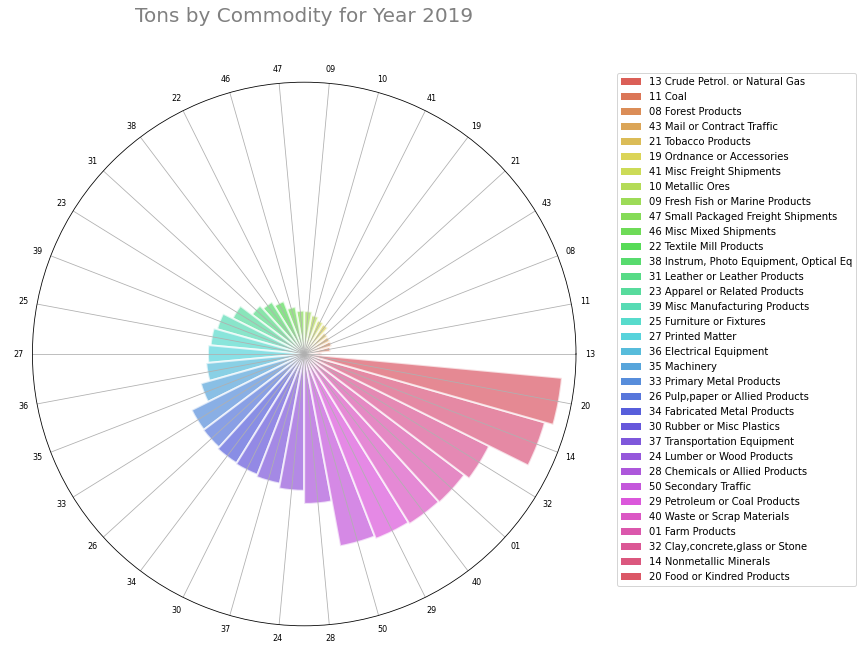

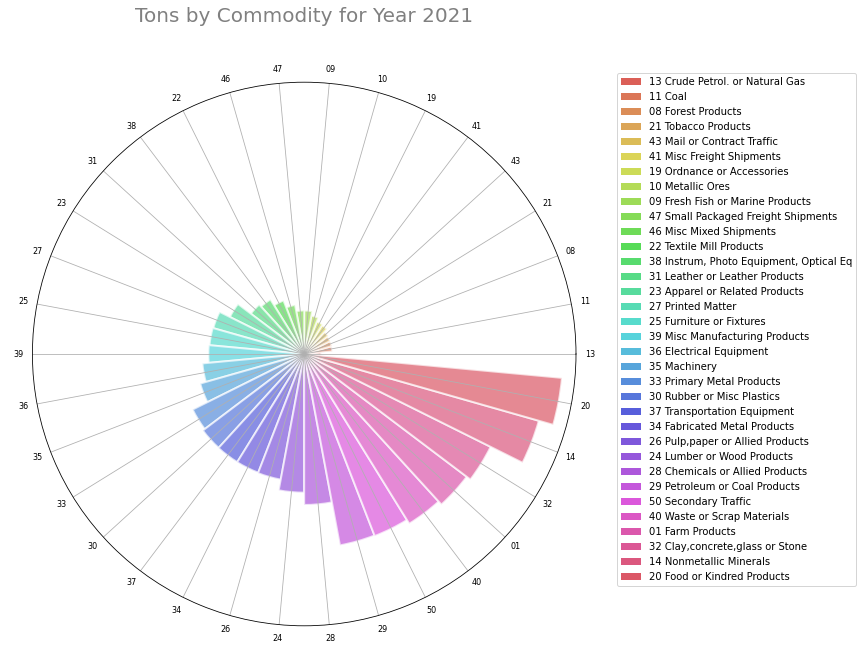

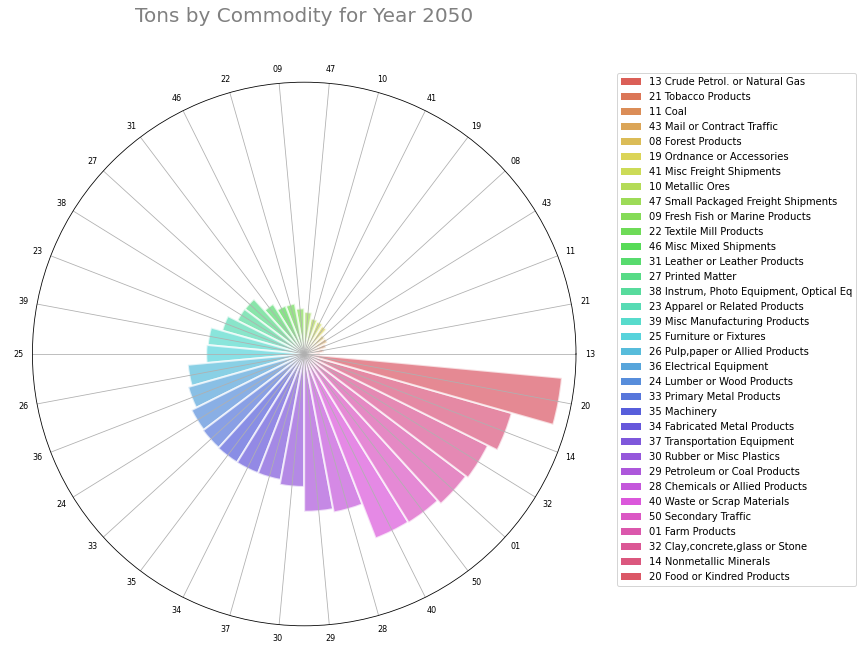

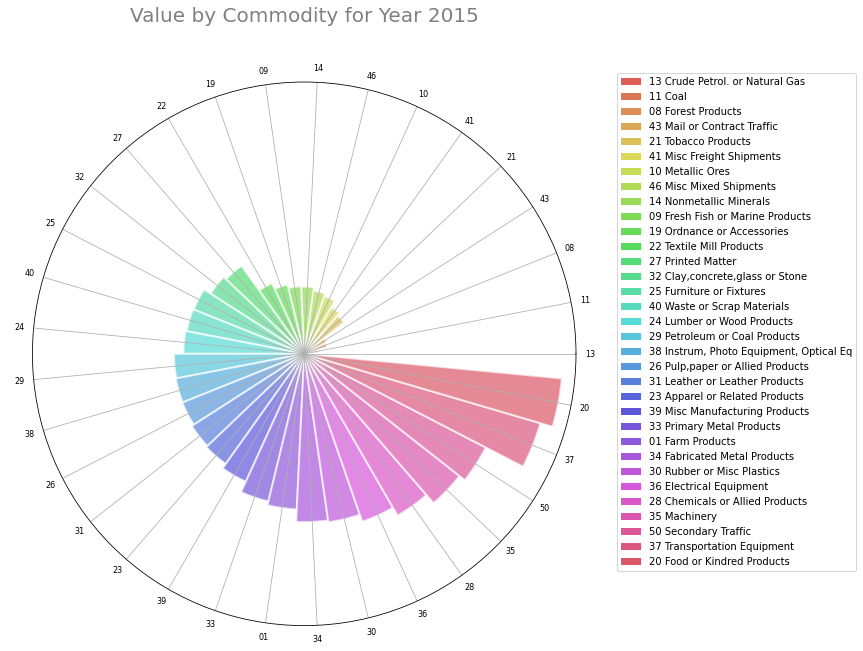

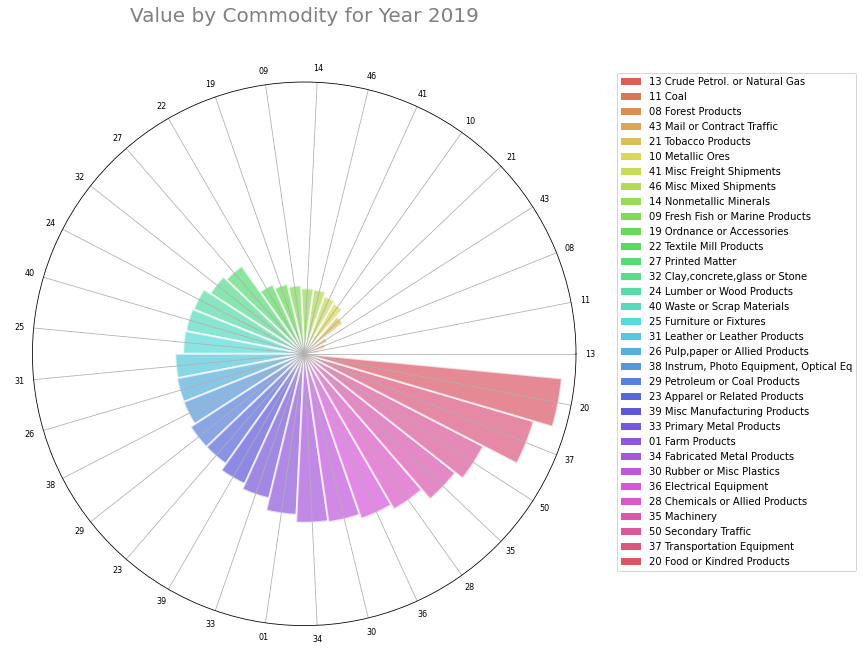

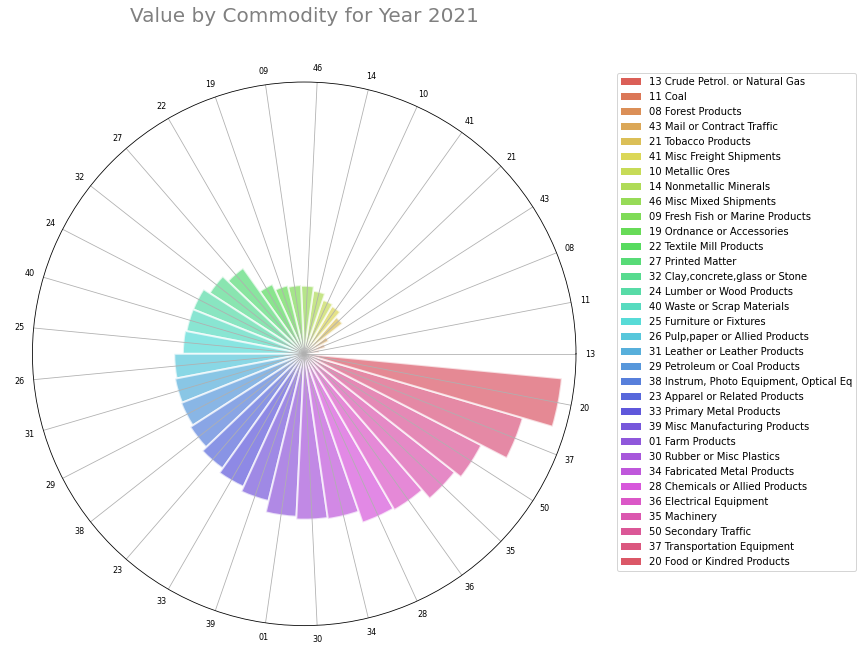

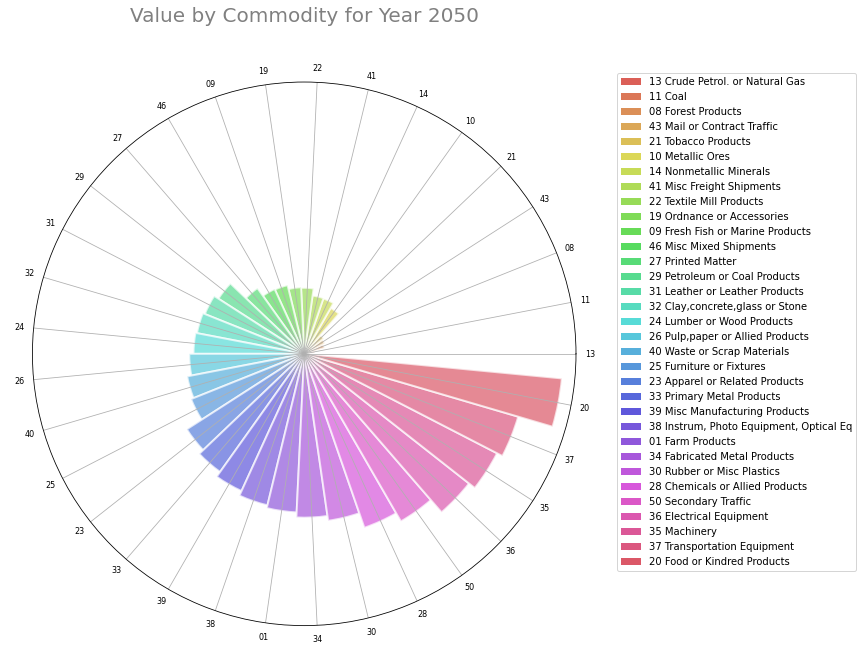

In [23]:
years = summary['Year'].unique()
# Run the function for each year for tons
for year in years:
    create_commodity_circular_bar_chart(summary, year, 'Tons')

# Run the function for each year for value
for year in years:
    create_commodity_circular_bar_chart(summary, year, 'Value')


In [ ]:

# # # Creating separate dataframes for tons and value where their values are greater than 0
# tons_summary = summary[summary['Tons'] > 0]
# value_summary = summary[summary['Value'] > 0]

# years = clark_county_ts2021['Year'].unique()

# # Run the function for each year for tons
# for year in years:
#     create_commodity_circular_bar_chart(tons_summary, year, 'Tons')

# # Run the function for each year for value
# for year in years:
#     create_commodity_circular_bar_chart(value_summary, year, 'Value')


In [7]:
summary

NameError: name 'summary' is not defined

In [40]:
# # Define your formatting function
# format_func = lambda x: '{:,.2f}'.format(x)

# # Apply the formatting function to the specified columns
# summary['Tons'] = summary['Tons'].apply(format_func)
# summary['Value'] = summary['Value'].apply(format_func)

In [15]:
summary

Year STCC_2digit        Commodity_y  Origin Region  \
0       2015          01      Farm Products              1   
1       2015          01      Farm Products              1   
2       2015          01      Farm Products              2   
3       2015          01      Farm Products              3   
4       2015          01      Farm Products              4   
...      ...         ...                ...            ...   
133965  2050          50  Secondary Traffic          32003   
133966  2050          50  Secondary Traffic          32003   
133967  2050          50  Secondary Traffic          32003   
133968  2050          50  Secondary Traffic          32003   
133969  2050          50  Secondary Traffic          32003   

        Destination Region          Tons         Value  
0                      165  5.080865e-01  8.525633e+01  
1                    32003  3.107278e+00  3.711394e+03  
2                    32003  8.374276e-02  1.281264e+01  
3                    32003  9.260099e-01  2.349358e+03  
4                    32003  2.833291e+00  3.513439e+03  
...                    ...           ...           ...  
133965                 305  4.722697e+00  6.757475e+03  
133966                 307  9.874210e+02  1.412852e+06  
133967                 308  3.389173e+02  4.849401e+05  
133968                 309  1.117016e+03  1.598284e+06  
133969               32003  1.351893e+06  4.212721e+09  

[133970 rows x 7 columns]

In [8]:
# Concatenate 'STCC_2digit' and 'Commodity_y'
summary['Commodity'] = summary.apply(lambda row: f"{row['STCC_2digit']} {row['Commodity']}", axis=1)


NameError: name 'summary' is not defined

In [10]:
summary

Year STCC_2digit                           Commodity  Origin Region  \
0       2015          01               01 Animal Specialties             12   
1       2015          01               01 Animal Specialties             12   
2       2015          01               01 Animal Specialties             12   
3       2015          01               01 Animal Specialties             12   
4       2015          01               01 Animal Specialties             12   
...      ...         ...                                 ...            ...   
520791  2050          50  50 Warehouse & Distribution Center          32003   
520792  2050          50  50 Warehouse & Distribution Center          32003   
520793  2050          50  50 Warehouse & Distribution Center          32003   
520794  2050          50  50 Warehouse & Distribution Center          32003   
520795  2050          50  50 Warehouse & Distribution Center          32003   

        Destination Region          Tons         Value  
0                      270  1.809777e+00  3.774927e+03  
1                      286  4.883927e-01  1.018715e+03  
2                      287  8.590316e-01  1.791812e+03  
3                      288  3.360728e+00  7.009981e+03  
4                    32003  2.800486e+01  5.841397e+04  
...                    ...           ...           ...  
520791                 305  4.722697e+00  6.757475e+03  
520792                 307  9.874210e+02  1.412852e+06  
520793                 308  3.389173e+02  4.849401e+05  
520794                 309  1.117016e+03  1.598284e+06  
520795               32003  1.025671e+06  1.467582e+09  

[520796 rows x 7 columns]

In [51]:
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties

font = FontProperties(family='Baskerville Old Face')

def create_commodity_circular_bar_chart1(df, year, variable):
    df_year = df[(df['Year'] == year) & (df[variable] > 0)]
    
    if df_year.empty:
        print(f"No positive values for '{variable}' in year {year}. Skipping plot.")
        return
    
    # Sort the DataFrame by 'STCC_2digit'
    df_year = df_year.sort_values(by='STCC_2digit')
    
    commodities = df_year['Commodity'].unique()
    color_dict = dict(zip(commodities, sns.color_palette("hls", len(commodities))))
    
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))
    
    lowerLimit = 10
    upperLimit = 100
    
    max_val = df_year[variable].max()
    slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
    heights = slope * np.cbrt(df_year[variable]) + lowerLimit
    
    widths = 2*np.pi / len(commodities)
    indices = range(len(df_year))
    angles = [i*widths for i in indices]
    
    bars = ax.bar(x=angles, height=heights, width=widths, bottom=lowerLimit, linewidth=3, edgecolor='white')
    
    for bar, angle, height, commodity in zip(bars, angles, heights, df_year['Commodity']):
        bar.set_facecolor(color_dict[commodity])
        bar.set_alpha(0.7)
    
    ax.set_yticks([])
    ax.set_xticks(angles)
    ax.set_xticklabels(df_year['STCC_2digit'], fontsize=16, rotation=45, fontproperties=font)
    
    ax.set_title(f'{variable} by Commodity for Year {year}', size=18, color='black', y=1.1, fontproperties=font)
    
    ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax2.axis('off')

    legend_elements = [Patch(facecolor=color_dict[commodity], label=commodity) for commodity in commodities]
    legend = ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1.1), prop=font)

    # Set the fontsize for the legend texts
    for text in legend.get_texts():
        text.set_fontsize(15)  # Adjust the fontsize here

    plt.show()


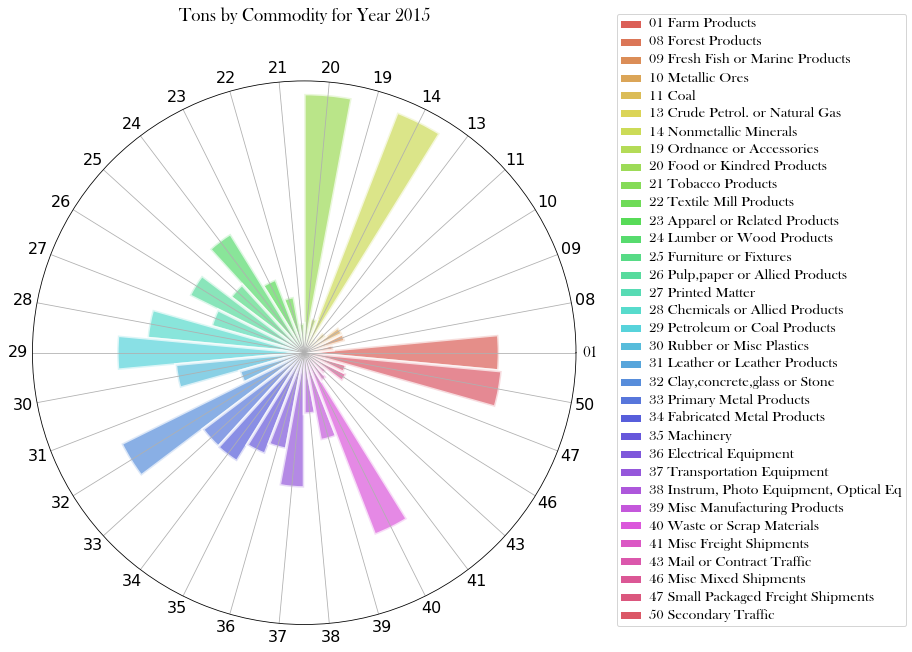

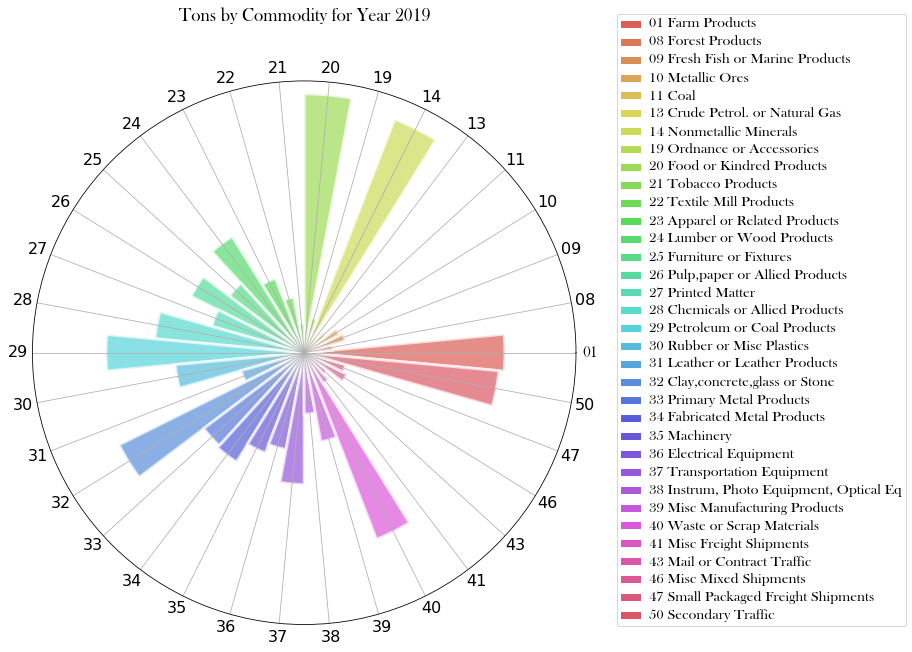

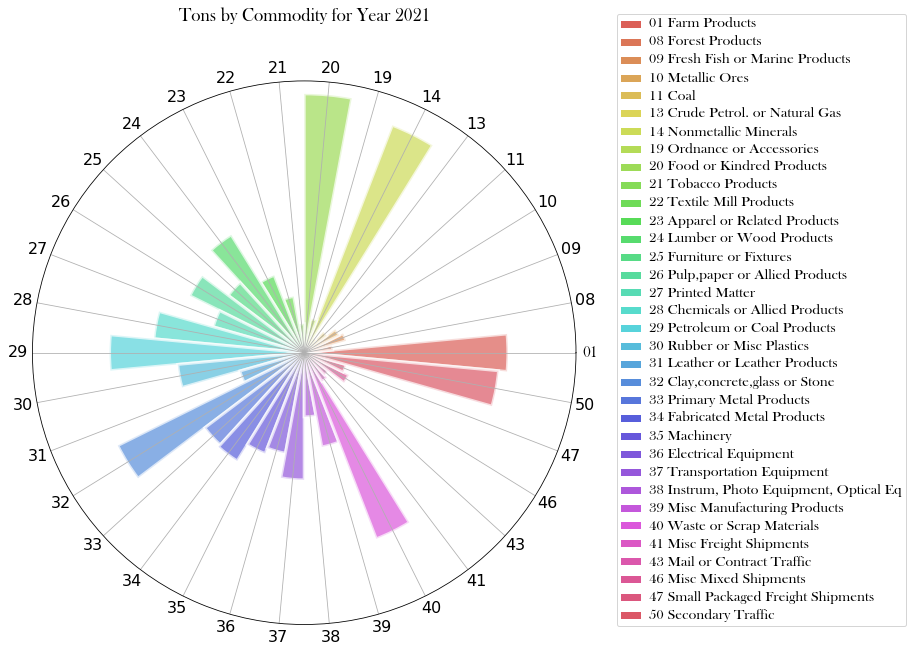

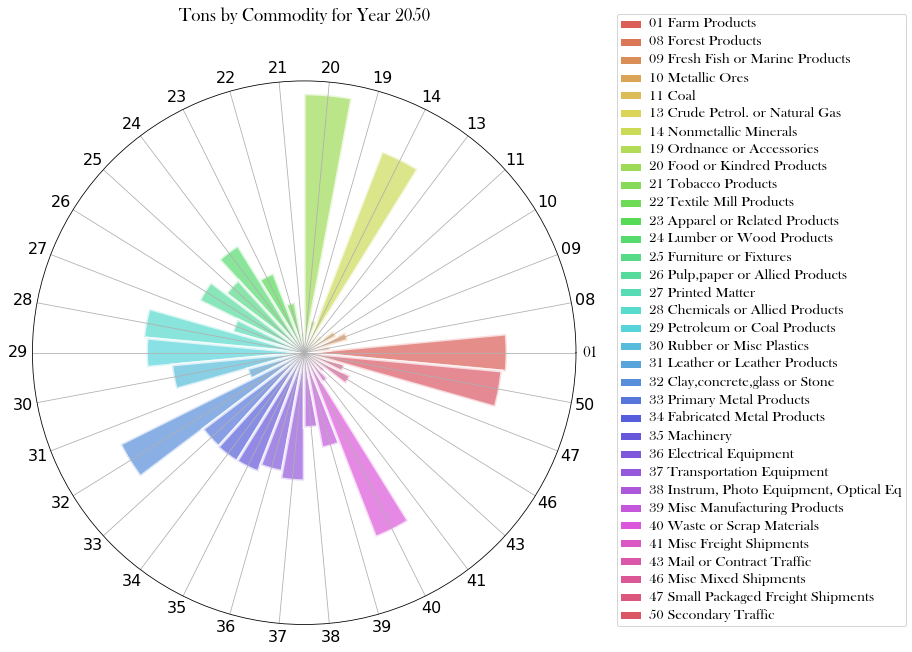

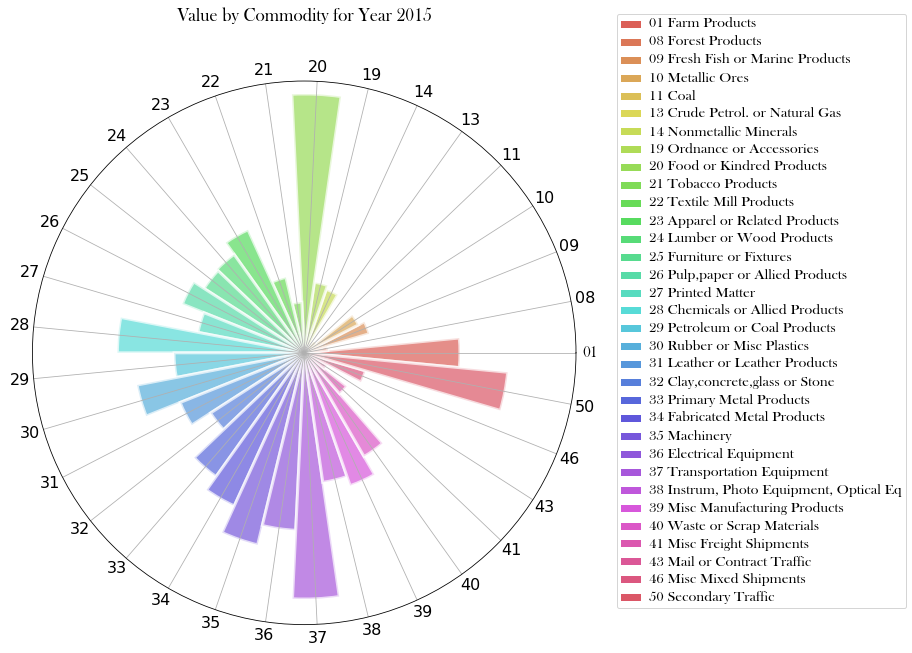

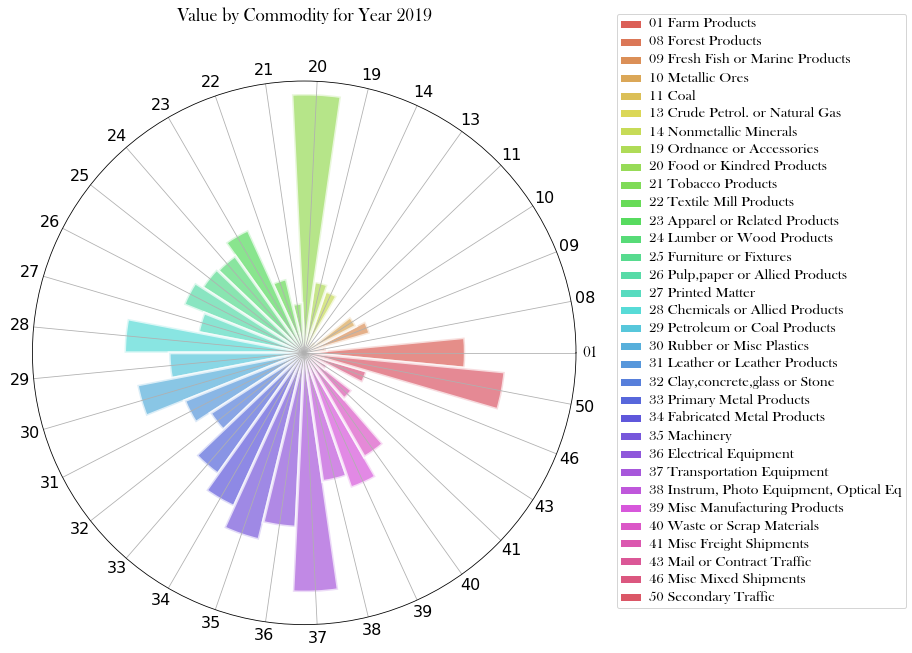

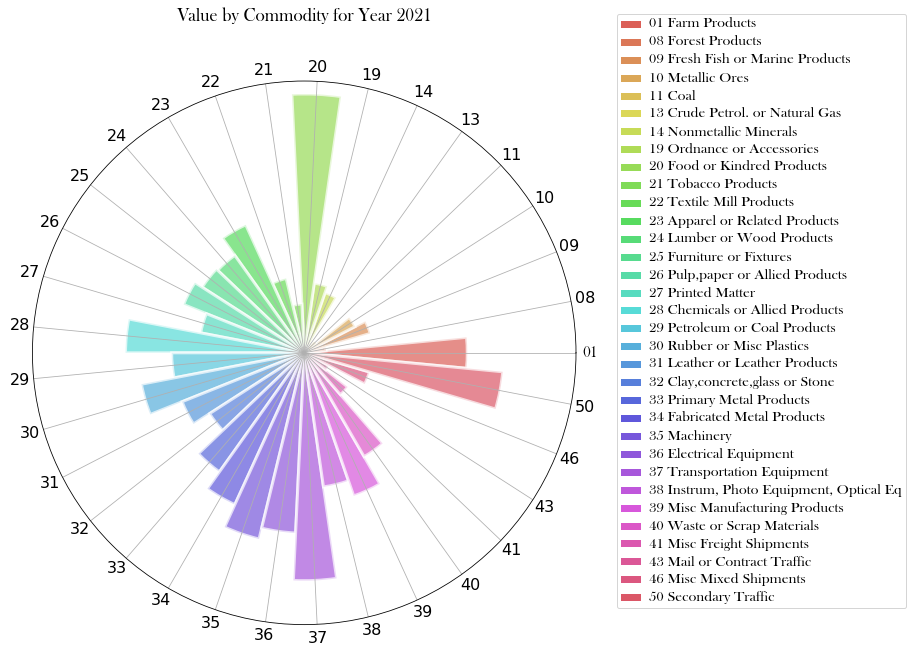

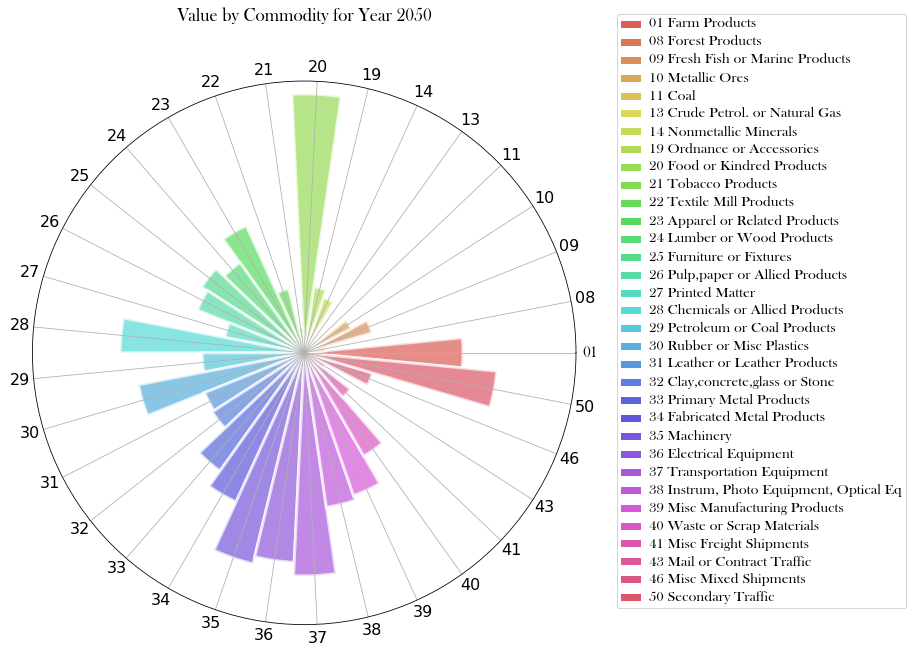

In [52]:

years = summary['Year'].unique()
# Run the function for each year for tons
for year in years:
    create_commodity_circular_bar_chart1(summary, year, 'Tons')

# Run the function for each year for value
for year in years:
    create_commodity_circular_bar_chart1(summary, year, 'Value')

In [13]:
summary

Year STCC_2digit                           Commodity  Origin Region  \
0       2015          01               01 Animal Specialties             12   
1       2015          01               01 Animal Specialties             12   
2       2015          01               01 Animal Specialties             12   
3       2015          01               01 Animal Specialties             12   
4       2015          01               01 Animal Specialties             12   
...      ...         ...                                 ...            ...   
520791  2050          50  50 Warehouse & Distribution Center          32003   
520792  2050          50  50 Warehouse & Distribution Center          32003   
520793  2050          50  50 Warehouse & Distribution Center          32003   
520794  2050          50  50 Warehouse & Distribution Center          32003   
520795  2050          50  50 Warehouse & Distribution Center          32003   

        Destination Region          Tons         Value  
0                      270  1.809777e+00  3.774927e+03  
1                      286  4.883927e-01  1.018715e+03  
2                      287  8.590316e-01  1.791812e+03  
3                      288  3.360728e+00  7.009981e+03  
4                    32003  2.800486e+01  5.841397e+04  
...                    ...           ...           ...  
520791                 305  4.722697e+00  6.757475e+03  
520792                 307  9.874210e+02  1.412852e+06  
520793                 308  3.389173e+02  4.849401e+05  
520794                 309  1.117016e+03  1.598284e+06  
520795               32003  1.025671e+06  1.467582e+09  

[520796 rows x 7 columns]

In [86]:
# Save as CSV
summary.to_csv(r'H:\My Drive\7. SNV Industry Study\1.) Summary\Commodity\Files\summary.csv', index=False)

# Save as Excel
#summary.to_excel(r'H:\My Drive\7. SNV Industry Study\1.) Summary\Commodity\Files\summary.xlsx', index=False)


In [4]:
print(summary.columns)


NameError: name 'summary' is not defined

In [14]:
# Filter the data
outbound = summary[(summary['Origin Region'] == 32003) & (summary['Destination Region'] != 32003)]
inbound = summary[(summary['Origin Region'] != 32003) & (summary['Destination Region'] == 32003)]
through = summary[(summary['Origin Region'] != 32003) & (summary['Destination Region'] != 32003)]
intra = summary[(summary['Origin Region'] == 32003) & (summary['Destination Region'] == 32003)]

# Group by Year, Commodity for each filter and calculate the sum of Values and Tons
outbound_summary = outbound.groupby(['Year', 'Commodity'])[['Value', 'Tons']].sum().reset_index()
inbound_summary = inbound.groupby(['Year', 'Commodity'])[['Value', 'Tons']].sum().reset_index()
through_summary = through.groupby(['Year', 'Commodity'])[['Value', 'Tons']].sum().reset_index()
intra_summary = intra.groupby(['Year', 'Commodity'])[['Value', 'Tons']].sum().reset_index()

# Rename the Value and Tons columns for each filter
outbound_summary.rename(columns={'Value': 'OB_Value', 'Tons': 'OB_Tons'}, inplace=True)
inbound_summary.rename(columns={'Value': 'IB_Value', 'Tons': 'IB_Tons'}, inplace=True)
through_summary.rename(columns={'Value': 'Thr_Value', 'Tons': 'Thr_Tons'}, inplace=True)
intra_summary.rename(columns={'Value': 'Intr_Value', 'Tons': 'Intr_Tons'}, inplace=True)

# Merge all the DataFrames on Year and Commodity
summary_final = pd.merge(outbound_summary, inbound_summary, on=['Year', 'Commodity'], how='outer')
summary_final = pd.merge(summary_final, through_summary, on=['Year', 'Commodity'], how='outer')
summary_final = pd.merge(summary_final, intra_summary, on=['Year', 'Commodity'], how='outer')

# Print the final DataFrame
print(summary_final)


     Year                         Commodity      OB_Value       OB_Tons  \
0    2015                  01 Farm Products  7.589615e+06  3.405587e+04   
1    2015  09 Fresh Fish or Marine Products  4.005281e+04  1.263580e+01   
2    2015                  10 Metallic Ores  8.197417e+06  6.976748e+02   
3    2015                           11 Coal  1.795404e+01  4.204394e-01   
4    2015           14 Nonmetallic Minerals  3.089182e+07  2.109608e+06   
..    ...                               ...           ...           ...   
135  2050    31 Leather or Leather Products           NaN           NaN   
136  2015   13 Crude Petrol. or Natural Gas           NaN           NaN   
137  2019   13 Crude Petrol. or Natural Gas           NaN           NaN   
138  2021   13 Crude Petrol. or Natural Gas           NaN           NaN   
139  2050   13 Crude Petrol. or Natural Gas           NaN           NaN   

         IB_Value       IB_Tons     Thr_Value      Thr_Tons    Intr_Value  \
0    1.160019e+09  1.0

In [15]:
summary_final

Year                         Commodity      OB_Value       OB_Tons  \
0    2015                  01 Farm Products  7.589615e+06  3.405587e+04   
1    2015  09 Fresh Fish or Marine Products  4.005281e+04  1.263580e+01   
2    2015                  10 Metallic Ores  8.197417e+06  6.976748e+02   
3    2015                           11 Coal  1.795404e+01  4.204394e-01   
4    2015           14 Nonmetallic Minerals  3.089182e+07  2.109608e+06   
..    ...                               ...           ...           ...   
135  2050    31 Leather or Leather Products           NaN           NaN   
136  2015   13 Crude Petrol. or Natural Gas           NaN           NaN   
137  2019   13 Crude Petrol. or Natural Gas           NaN           NaN   
138  2021   13 Crude Petrol. or Natural Gas           NaN           NaN   
139  2050   13 Crude Petrol. or Natural Gas           NaN           NaN   

         IB_Value       IB_Tons     Thr_Value      Thr_Tons    Intr_Value  \
0    1.160019e+09  1.053289e+06  4.906592e+09  5.970038e+06  4.610491e+05   
1    2.013367e+08  1.454032e+04  2.861900e+08  2.472157e+04  1.107101e+05   
2    6.839969e+07  6.147477e+03  2.816180e+08  3.188857e+04           NaN   
3    1.529573e+02  3.581883e+00  4.290150e+06  5.646533e+03           NaN   
4    6.136271e+07  3.126030e+06  3.186999e+08  5.191261e+06  6.532030e+07   
..            ...           ...           ...           ...           ...   
135  5.475091e+08  3.228453e+04  2.804789e+09  1.838465e+05  6.784683e+05   
136           NaN           NaN  1.214087e+05  3.212875e+02           NaN   
137           NaN           NaN  1.386869e+05  4.864976e+02           NaN   
138           NaN           NaN  1.069989e+05  4.183172e+02           NaN   
139           NaN           NaN  1.646991e+05  6.438280e+02           NaN   

        Intr_Tons  
0    2.131009e+03  
1    1.467359e+01  
2             NaN  
3             NaN  
4    6.542102e+06  
..            ...  
135  7.503846e+00  
136           NaN  
137           NaN  
138           NaN  
139           NaN  

[140 rows x 10 columns]

In [113]:
# Create a copy of the original DataFrame
summary_final_copy = summary_final.copy()

# Calculate total tons and values for each year
total_tons_per_year = summary_final_copy.groupby('Year')[['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons']].sum().reset_index()
total_values_per_year = summary_final_copy.groupby('Year')[['OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value']].sum().reset_index()

# Set 'Year' as index for easy lookup
total_tons_per_year.set_index('Year', inplace=True)
total_values_per_year.set_index('Year', inplace=True)

# Calculate the percentage for each commodity
for direction in ['OB', 'IB', 'Thr', 'Intr']:
    summary_final_copy[f'{direction}_Tons_%'] = summary_final_copy.apply(lambda row: row[f'{direction}_Tons'] / total_tons_per_year.loc[row['Year'], f'{direction}_Tons'] * 100, axis=1)
    summary_final_copy[f'{direction}_Value_%'] = summary_final_copy.apply(lambda row: row[f'{direction}_Value'] / total_values_per_year.loc[row['Year'], f'{direction}_Value'] * 100, axis=1)

# Print the final DataFrame
print(summary_final_copy)


     Year                         Commodity      OB_Value       OB_Tons  \
0    2015                  01 Farm Products  7.589615e+06  3.405587e+04   
1    2015  09 Fresh Fish or Marine Products  4.005281e+04  1.263580e+01   
2    2015                  10 Metallic Ores  8.197417e+06  6.976748e+02   
3    2015                           11 Coal  1.795404e+01  4.204394e-01   
4    2015           14 Nonmetallic Minerals  3.089182e+07  2.109608e+06   
..    ...                               ...           ...           ...   
135  2050    31 Leather or Leather Products           NaN           NaN   
136  2015   13 Crude Petrol. or Natural Gas           NaN           NaN   
137  2019   13 Crude Petrol. or Natural Gas           NaN           NaN   
138  2021   13 Crude Petrol. or Natural Gas           NaN           NaN   
139  2050   13 Crude Petrol. or Natural Gas           NaN           NaN   

         IB_Value       IB_Tons     Thr_Value      Thr_Tons    Intr_Value  \
0    1.160019e+09  1.0

In [114]:
summary_final_copy

Year                         Commodity      OB_Value       OB_Tons  \
0    2015                  01 Farm Products  7.589615e+06  3.405587e+04   
1    2015  09 Fresh Fish or Marine Products  4.005281e+04  1.263580e+01   
2    2015                  10 Metallic Ores  8.197417e+06  6.976748e+02   
3    2015                           11 Coal  1.795404e+01  4.204394e-01   
4    2015           14 Nonmetallic Minerals  3.089182e+07  2.109608e+06   
..    ...                               ...           ...           ...   
135  2050    31 Leather or Leather Products           NaN           NaN   
136  2015   13 Crude Petrol. or Natural Gas           NaN           NaN   
137  2019   13 Crude Petrol. or Natural Gas           NaN           NaN   
138  2021   13 Crude Petrol. or Natural Gas           NaN           NaN   
139  2050   13 Crude Petrol. or Natural Gas           NaN           NaN   

         IB_Value       IB_Tons     Thr_Value      Thr_Tons    Intr_Value  \
0    1.160019e+09  1.053289e+06  4.906592e+09  5.970038e+06  4.610491e+05   
1    2.013367e+08  1.454032e+04  2.861900e+08  2.472157e+04  1.107101e+05   
2    6.839969e+07  6.147477e+03  2.816180e+08  3.188857e+04           NaN   
3    1.529573e+02  3.581883e+00  4.290150e+06  5.646533e+03           NaN   
4    6.136271e+07  3.126030e+06  3.186999e+08  5.191261e+06  6.532030e+07   
..            ...           ...           ...           ...           ...   
135  5.475091e+08  3.228453e+04  2.804789e+09  1.838465e+05  6.784683e+05   
136           NaN           NaN  1.214087e+05  3.212875e+02           NaN   
137           NaN           NaN  1.386869e+05  4.864976e+02           NaN   
138           NaN           NaN  1.069989e+05  4.183172e+02           NaN   
139           NaN           NaN  1.646991e+05  6.438280e+02           NaN   

        Intr_Tons  OB_Tons_%    OB_Value_%  IB_Tons_%    IB_Value_%  \
0    2.131009e+03   0.550735  1.223555e-01   5.975509  4.109838e+00   
1    1.467359e+01   0.000204  6.457087e-04   0.082490  7.133168e-01   
2             NaN   0.011282  1.321541e-01   0.034876  2.423336e-01   
3             NaN   0.000007  2.894449e-07   0.000020  5.419131e-07   
4    6.542102e+06  34.115549  4.980205e-01  17.734556  2.174022e-01   
..            ...        ...           ...        ...           ...   
135  7.503846e+00        NaN           NaN   0.121741  1.121328e+00   
136           NaN        NaN           NaN        NaN           NaN   
137           NaN        NaN           NaN        NaN           NaN   
138           NaN        NaN           NaN        NaN           NaN   
139           NaN        NaN           NaN        NaN           NaN   

     Thr_Tons_%  Thr_Value_%  Intr_Tons_%  Intr_Value_%  
0     11.774493     4.031416     0.013233      0.005646  
1      0.048757     0.235143     0.000091      0.001356  
2      0.062893     0.231387          NaN           NaN  
3      0.011136     0.003525          NaN           NaN  
4     10.238539     0.261854    40.624824      0.799973  
..          ...          ...          ...           ...  
135    0.245228     1.383026     0.000040      0.005727  
136    0.000634     0.000100          NaN           NaN  
137    0.001001     0.000122          NaN           NaN  
138    0.000860     0.000094          NaN           NaN  
139    0.000859     0.000081          NaN           NaN  

[140 rows x 18 columns]

In [116]:
summary_final_copy.to_csv(r'H:\My Drive\7. SNV Industry Study\1.) Summary\Commodity\Files\summary_final_copy.csv', index=False)


In [117]:
# Create a copy of the original DataFrame
summary_final_copy = summary_final.copy()

# Calculate total tons and values for each year
total_tons_per_year = summary_final_copy.groupby('Year')[['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons']].sum().reset_index()
total_values_per_year = summary_final_copy.groupby('Year')[['OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value']].sum().reset_index()

# Set 'Year' as index for easy lookup
total_tons_per_year.set_index('Year', inplace=True)
total_values_per_year.set_index('Year', inplace=True)

# Calculate the percentage for each commodity
for direction in ['OB', 'IB', 'Thr', 'Intr']:
    summary_final_copy[f'{direction}_Tons_%'] = summary_final_copy.apply(lambda row: row[f'{direction}_Tons'] / total_tons_per_year.loc[row['Year'], f'{direction}_Tons'] * 100, axis=1)
    summary_final_copy[f'{direction}_Value_%'] = summary_final_copy.apply(lambda row: row[f'{direction}_Value'] / total_values_per_year.loc[row['Year'], f'{direction}_Value'] * 100, axis=1)

# Calculate total tons and values for each commodity
summary_final_copy['Total_Tons'] = summary_final_copy[['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons']].sum(axis=1)
summary_final_copy['Total_Value'] = summary_final_copy[['OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value']].sum(axis=1)

# Create a new DataFrame with only the specified columns
columns_order = ['Year', 'Commodity', 'Total_Value', 'OB_Value_%', 'IB_Value_%', 'Thr_Value_%', 'Intr_Value_%', 'Total_Tons', 'OB_Tons_%', 'IB_Tons_%', 'Thr_Tons_%', 'Intr_Tons_%']
summary_final_percent = summary_final_copy[columns_order]

# Print the final DataFrame
print(summary_final_percent)


     Year                         Commodity   Total_Value    OB_Value_%  \
0    2015                  01 Farm Products  6.074662e+09  1.223555e-01   
1    2015  09 Fresh Fish or Marine Products  4.876775e+08  6.457087e-04   
2    2015                  10 Metallic Ores  3.582151e+08  1.321541e-01   
3    2015                           11 Coal  4.290321e+06  2.894449e-07   
4    2015           14 Nonmetallic Minerals  4.762748e+08  4.980205e-01   
..    ...                               ...           ...           ...   
135  2050    31 Leather or Leather Products  3.352977e+09           NaN   
136  2015   13 Crude Petrol. or Natural Gas  1.214087e+05           NaN   
137  2019   13 Crude Petrol. or Natural Gas  1.386869e+05           NaN   
138  2021   13 Crude Petrol. or Natural Gas  1.069989e+05           NaN   
139  2050   13 Crude Petrol. or Natural Gas  1.646991e+05           NaN   

       IB_Value_%  Thr_Value_%  Intr_Value_%    Total_Tons  OB_Tons_%  \
0    4.109838e+00     4.03

In [118]:
summary_final_percent.to_csv(r'H:\My Drive\7. SNV Industry Study\1.) Summary\Commodity\Files\summary_final_percent.csv', index=False)
